In [122]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nilearn import image
from nilearn.plotting import plot_carpet, plot_stat_map, plot_roi

from nilearn import input_data
from nilearn.connectome import ConnectivityMeasure
from nilearn.maskers import NiftiSpheresMasker
from nilearn import datasets
from scipy.signal import hilbert
from os import listdir

In [5]:
dmn_coords = {'PCC':(0, -52, 18), # Posterior Cingulate Cortex
              'LTJ':(-46, -68, 32), # Left Temporoparietal junction
              'RTJ':(46, -68, 32), # Right Temporoparietal junction
              'MPC':(1, 50, -5)} # Medial prefrontal cortex

def get_network_masker(network_coords):

    net_xyz = list(network_coords.values())
    net_lbl = list(network_coords.keys())

    masker = input_data.NiftiSpheresMasker(
        net_xyz, radius=20,
        detrend=True, standardize=False,
        low_pass=0.1, high_pass=0.01, t_r=2,
        memory='nilearn_cache', memory_level=1, verbose=0)
    
    return masker, net_lbl

def extract_functional_conn(time_series, conn_type='correlation'):
    
    connectivity_measure = ConnectivityMeasure(kind=conn_type)
    correlation_matrix = connectivity_measure.fit_transform([time_series])[0]
    
    return correlation_matrix

In [6]:
processed_data_path = '/Users/giovanni/Documents/Datasets/LEMON/processed/'
cls_df = pd.read_json(processed_data_path+'LEMON_subject_clusters.json')

In [124]:
emotion_scales_path = '/Users/giovanni/Documents/Datasets/LEMON/Behavioural_Data_MPILMBB_LEMON/Emotion_and_Personality_Test_Battery_LEMON/'
scale_names = [s.split('.')[0] for s in listdir(emotion_scales_path) if s.split('.')[1] == 'csv']
emotion_scales = {}

for sn in scale_names:
    scale_path = emotion_scales_path+sn+'.csv'
    s = pd.read_csv(scale_path)
    emotion_scales[sn]=s

scale = emotion_scales['TICS']
scale = scale.rename(columns={'Unnamed: 0':'sbj_id'})

scale_df = scale


scale = emotion_scales['PSQ']
scale = scale.replace(' ', np.nan)
scale = scale.dropna()
scale = scale.rename(columns={'Unnamed: 0':'sbj_id'})
scale = scale.astype({'PSQ_Worries': 'float', 'PSQ_Tension': 'float', 'PSQ_Joy': 'float', 'PSQ_Demands': 'float', 'PSQ_OverallScore': 'float'})

scale_df = scale_df.merge(scale, on='sbj_id', how='left')


scale = emotion_scales['STAI_G_X2']
scale = scale.rename(columns={'Unnamed: 0':'sbj_id'})

scale_df = scale_df.merge(scale, on='sbj_id', how='left').dropna()

scale_cols = scale_df.columns[1:]

In [18]:
fmri_path = '/Users/giovanni/Documents/Datasets/LEMON/neuro/MNI2mm/'
conf_path = '/Users/giovanni/Documents/Datasets/LEMON/neuro/confounds/'

masker, labels = get_network_masker(dmn_coords)
net_name = 'DMN'

corr_mat_s = []
parc_mat_s = []
ampli_s = []


for i, r in cls_df.iterrows():

    s = r['sbj_id']

    print('----- {0} -----'.format(s))

    sbj_frmi_path = fmri_path+'{0}_ses-01_task-rest_acq-AP_run-01_MNI2mm.nii'.format(s)
    sbj_conf_path = conf_path+'{0}_ses-01_task-rest_acq-AP_run-01_confounds.txt'.format(s)
    func_img = image.load_img(sbj_frmi_path)
    conf = np.loadtxt(sbj_conf_path)

    time_series = masker.fit_transform(func_img, confounds=conf)
    corr_mat = extract_functional_conn(time_series)
    parc_mat = extract_functional_conn(time_series, conn_type='partial correlation')
    ampli = np.abs(hilbert(time_series)).mean(0)

    corr_mat_s.append(corr_mat)
    parc_mat_s.append(parc_mat)
    ampli_s.append(ampli)



----- sub-032485 -----
----- sub-032449 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032362 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032344 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.53s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032470 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032501 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032397 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032423 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032471 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032422 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032484 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032363 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032330 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032389 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032345 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032402 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032390 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032506 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032520 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032424 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032451 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032365 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032482 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032468 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032364 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032483 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032342 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032469 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032391 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032403 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032507 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032476 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032328 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032521 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032425 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032495 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032354 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.55s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032387 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032511 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032433 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032446 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032510 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032432 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032494 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032516 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032412 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032380 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032434 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032492 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032375 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032478 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032353 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032479 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032508 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032517 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032381 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032413 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032440 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032487 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032360 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032472 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032359 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032503 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032421 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032473 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032406 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032358 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032502 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032499 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032455 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032524 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032420 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032486 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032361 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032504 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032400 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032522 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032453 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032480 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032334 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032366 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032505 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032393 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032474 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032523 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032370 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032497 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032408 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032356 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032349 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032417 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032385 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032348 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032416 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.52s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032489 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032371 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032496 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032304 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032409 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032465 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032410 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032368 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032436 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.54s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032377 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032369 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.63s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


----- sub-032437 -----


/Users/giovanni/opt/anaconda3/envs/biomkr_397/lib/python3.9/site-packages/nilearn/maskers/nifti_spheres_masker.py:403: UserWarning: Persisting input arguments took 4.55s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  signals, _ = self._cache(


In [22]:
cls_df['part_corr'] = parc_mat_s
cls_df['corr'] = corr_mat_s
cls_df['ampl'] = ampli_s



In [23]:
cls_df

,sbj_id,cluster_lbl,part_corr,corr,ampl
0,sub-032485,1,"[[1.0, 0.47057948, 0.08019982, 0.044316668], [...","[[1.0, 0.69208264, 0.4316092, 0.5169968], [0.6...","[0.11482386431575968, 0.12243180723003143, 0.0..."
1,sub-032449,3,"[[1.0, -0.13383724, 0.45024994, 0.4549708], [-...","[[1.0, 0.39197198, 0.63435864, 0.640674], [0.3...","[0.14726081954940717, 0.12237176805915305, 0.1..."
2,sub-032362,3,"[[1.0, 0.12636392, 0.3842679, 0.5277337], [0.1...","[[1.0, 0.59138733, 0.6574759, 0.7350592], [0.5...","[0.14095103591216482, 0.10759220764574298, 0.0..."
3,sub-032344,0,"[[1.0, 0.35020238, 0.31098846, 0.68260294], [0...","[[1.0, 0.7579562, 0.53931874, 0.81092906], [0....","[0.18640556667316138, 0.15235891839717688, 0.1..."
4,sub-032470,3,"[[1.0, 0.10758097, 0.17535782, 0.40306318], [0...","[[1.0, 0.44160825, 0.43857968, 0.5493147], [0....","[0.13410472692163897, 0.13241527134612002, 0.1..."
...,...,...,...,...,...
101,sub-032368,2,"[[1.0, 0.21184653, 0.5323094, 0.340996], [0.21...","[[1.0, 0.6273207, 0.8120026, 0.72113216], [0.6...","[0.16775297484512655, 0.11313357873591537, 0.1..."
102,sub-032436,3,"[[1.0, 0.12186336, 0.47211283, 0.6260845], [0....","[[1.0, 0.6912338, 0.73359525, 0.7256527], [0.6...","[0.14674015675402252, 0.11579999623401555, 0.1..."
103,sub-032377,1,"[[1.0, 0.20652075, 0.33064252, 0.61666656], [0...","[[1.0, 0.77201337, 0.6013587, 0.8419401], [0.7...","[0.16309187134157804, 0.16392828701430556, 0.0..."
104,sub-032369,1,"[[1.0, 0.17092744, 0.18861319, 0.56269413], [0...","[[1.0, 0.6839887, 0.41007724, 0.72111815], [0....","[0.1631365749365357, 0.14600773723695673, 0.13..."


In [24]:
processed_data_path = '/Users/giovanni/Documents/Datasets/LEMON/processed/'
cls_df.to_json(processed_data_path+'LEMON_subject_clusters_brain_act.json')

In [40]:
from nilearn import plotting

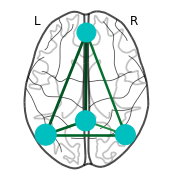

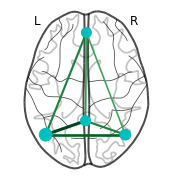

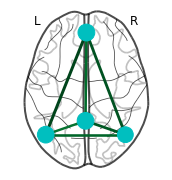

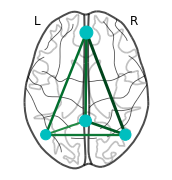

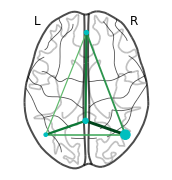

In [120]:
cls_n = 1

for cls_n in range(5):
    cls_mask = cls_df['cluster_lbl'] == cls_n
    ccc = 1 + np.nan_to_num(zscore(np.array([ c for c in cls_df['corr'].values]),0))[cls_mask, :, :].mean(0)
    aaa = 1 + zscore(np.vstack(cls_df['ampl'].values), 0)[cls_mask, :].mean(0)


    plotting.plot_connectome((1 + ccc) **4, list(dmn_coords.values()),
                            node_size = ((1+aaa) ** 2)*50,
                            display_mode = 'z', node_color='c', edge_cmap='Greens')
    
    plt.show()

In [129]:
cls_df = cls_df.merge(scale_df, on='sbj_id', how='left')


In [ ]:
cls_mask

In [151]:

cls_df['STAI_Trait_Anxiety_zscored'] = zscore(cls_df['STAI_Trait_Anxiety'])
stai_cls = [cls_df[cls_df['cluster_lbl'] == cls_n]['STAI_Trait_Anxiety_zscored'].values for cls_n in range(5)]

In [152]:
cls_df['PSQ_OverallScore_zscored'] = zscore(cls_df['PSQ_OverallScore'])
psq_cls = [cls_df[cls_df['cluster_lbl'] == cls_n]['PSQ_OverallScore_zscored'].values for cls_n in range(5)]

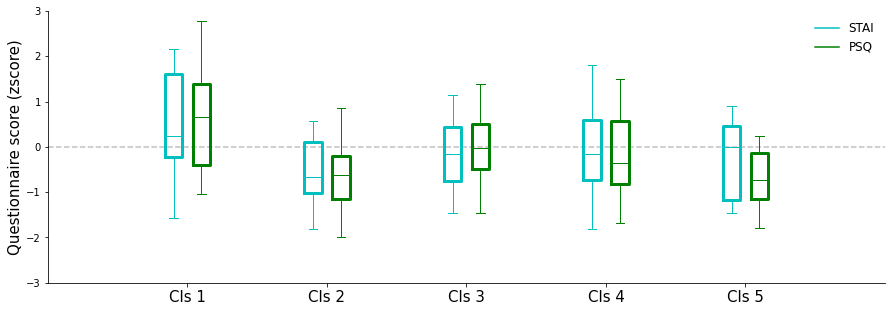

In [188]:


ticks = ['Cls 1', 'Cls 2', 'Cls 3', 'Cls 4', 'Cls 5']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(figsize=(15,5))

plt.axhline(0, ls='--', c='grey', alpha = .5)

bpl = plt.boxplot(stai_cls, positions=np.array(range(len(stai_cls)))*2.0-0.2, sym='', widths=0.25, boxprops= dict(linewidth=3.0))
bpr = plt.boxplot(psq_cls, positions=np.array(range(len(psq_cls)))*2.0+0.2, sym='', widths=0.25, boxprops= dict(linewidth=3.0))
set_box_color(bpl, 'c') # colors are from http://colorbrewer2.org/
set_box_color(bpr, 'g')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='c', label='STAI')
plt.plot([], c='g', label='PSQ')
plt.legend(fontsize=12, frameon=False)

plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=15)
plt.xlim(-2, len(ticks)*2)
plt.ylim(-3, 3)


plt.ylabel('Questionnaire score (zscore)', fontsize=15)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
